# Planejamento de Sistemas Elétricos

## Trabalho sobre Séries Sintéticas

Laura Mauad Gaio

25/08/2023

## Instalação

In [1]:
!pip install PySDDP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=5286509d1386795b0f7ccf97ecfbab17172f9ff59c9b60d9e4ed8bff25dff397
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26307 sha256=bda29a838aba4416a8e32ade4e9c18a73390d896e8df01d7f98000eb18a3eaa8
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built pyswarm typing


### Download do Conjunto de Arquivos para Cálculo do NEWAVE

https://www.ccee.org.br/web/guest/acervo-ccee

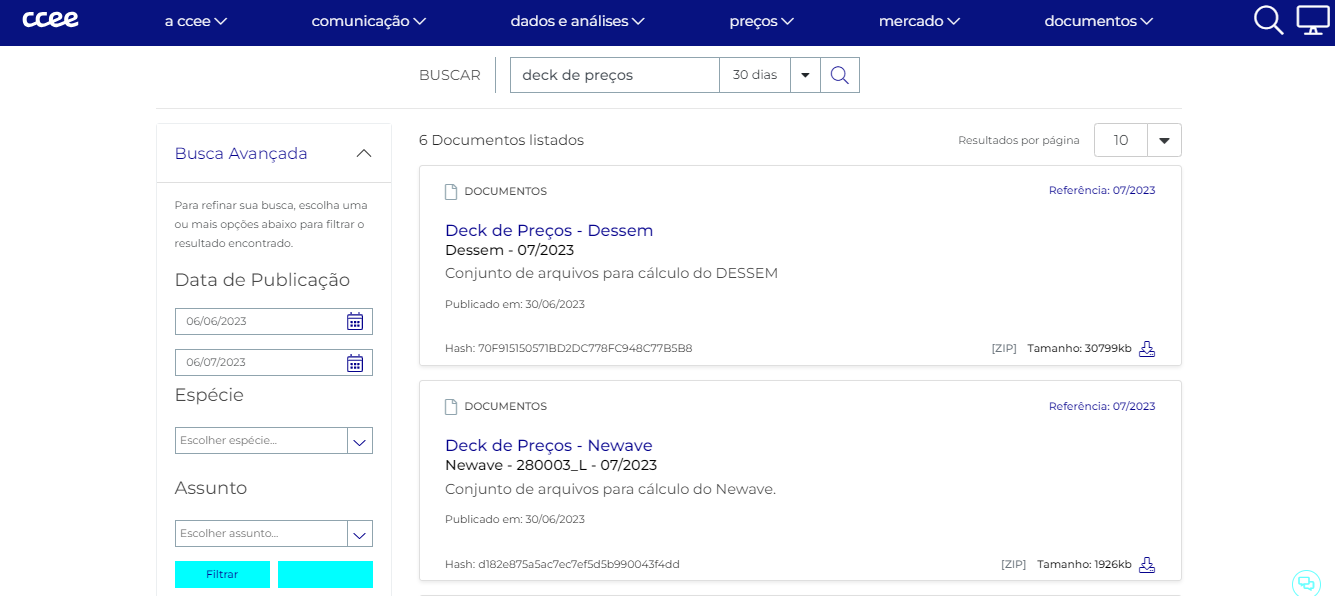

In [2]:
from google.colab import drive, files
import os

#Montar o Google Drive no Colab com o nome gdrive

drive.mount('/content/gdrive')

# O comando abaixo mostra qual diretório você está trabalhando momento.
print( os.getcwd() )

Caminho_do_Arquivo = 'gdrive/MyDrive/Planejamento_de_Sistemas_Eletricos_PPEE/Newave_Agosto2023'
# O comando mostra o que está presente dentro da minha pasta GIF no meu drive, que está dentro do meu drive e em Doutorado. Mudar para o diretório que vocês criaram.
print( os.listdir(Caminho_do_Arquivo) )

Mounted at /content/gdrive
/content
['VAZPAST.DAT', 'EXPH.DAT', 'CONFHD.DAT', 'MANUTT.DAT', 'DGER.DAT', 'MODIF.DAT', 'REE.DAT', 'ENSOAUX.DAT', 'C_ADIC.DAT', 'TERM.DAT', 'tecno.dat', 'CDEFVAR.DAT', 'EXPT.DAT', 'FORMAT.TMP', 'ITAIPU.DAT', 'CASO.DAT', 'POSTOS.DAT', 'CLAST.DAT', 'CVAR.DAT', 'CURVA.DAT', 'CONFT.DAT', 'LOSS.DAT', 'GHMIN.DAT', 'PENALID.DAT', 'selcor.dat', 'VAZOES.DAT', 'DSVAGUA.DAT', 'NewaveMsgPortug.txt', 'GTMINPAT.DAT', 'ARQUIVOS.DAT', 'RE.DAT', 'BID.DAT', 'AGRINT.DAT', 'HIDR.DAT', 'ADTERM.DAT', 'MENSAG.TMP', 'ELNINO.DAT', 'SHIST.DAT', 'GTMIN_CCEE_082023.xlsx', 'PATAMAR.DAT', 'SISTEMA.DAT']


In [3]:
from PySDDP.Pen import Newave

PMOAGO2023 = Newave(Caminho_do_Arquivo)

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do ARQUIVOS.DAT realizada com sucesso.
OK! Leitura do DGER.DAT realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do MODIF.DAT realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do EXPH.DAT realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do CONFHD.DAT realizada com sucesso.
OK! Leitura do REE.DAT realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do SISTEMA.DAT realizada com sucesso.


# Dados

In [63]:
import numpy as np

#-----> Dados

Usina = PMOAGO2023.confhd.get('Tucurui')

total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2
# total_anos = 4

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de phis considerados (num_meses = num_phis)
num_phis = 11

# # Número de meses considerados (num_meses = num_phis)
num_meses = num_phis


# # Núemero de séries consideradas
num_series = 500


# Problema de Otimização

**Função Objetivo (FOB):**

$Min \hspace{0.5cm} \varepsilon _{mes,1932}^{2} + \varepsilon _{mes,1933}^{2} + ... + \varepsilon _{mes,2021}^{2} $

sujeito a:

**Restrição de Iguadade:**

$ Z_{mes,ano} = \phi _{1} \cdot Z_{mes-1} + \phi _{2} \cdot Z_{mes-2} + ... + \phi _{11} \cdot Z_{mes-11} + \varepsilon _{mes,ano} $

$\sum _{i}^{ano} \varepsilon _{mes,iano} = 0$

**Restrições de Canalização:**

$ -\infty \le \phi \le \infty $

$ -\infty \le \varepsilon _{mes,ano} \le \infty $


## Exemplo de Problema de Otimização

**Função Objetivo (FOB):**

$Min \hspace{0.5cm} \varepsilon _{AGO,1932}^{2} + \varepsilon _{AGO,1933}^{2} + ... + \varepsilon _{AGO,2021}^{2} $

sujeito a:

**Restrição de Iguadade:**

$ Z_{AGO,1932} = \phi _{1} \cdot Z_{JUL,1932} + \phi _{2} \cdot Z_{JUN,1932} + \phi _{3} \cdot Z_{MAI,1932} + \varepsilon _{AGO,1932} $

$ Z_{AGO,1933} = \phi _{1} \cdot Z_{JUL,1933} + \phi _{2} \cdot Z_{JUN,1933} + \phi _{3} \cdot Z_{MAI,1933} + \varepsilon _{AGO,1933} $

...

$ Z_{AGO,2021} = \phi _{1} \cdot Z_{JUL,2021} + \phi _{2} \cdot Z_{JUN,2021} + \phi _{3} \cdot Z_{MAI,2021} + \varepsilon _{AGO,2021} $


$ \sum _{i=1932}^{2021} \varepsilon _{AGO,iano} = 0$


**Restrições de Canalização:**

$ -\infty \le \phi \le \infty $

$ -\infty \le \varepsilon _{mes,ano} \le \infty $

## Cálculo da Regressão Linear

In [81]:
from cvxopt import matrix, solvers
import numpy as np

def calculo_regressao_linear(Usina, mes, num_phis, imprime):

  # num_mes = mes - 1

  #-----> Função Objetivo

  # Parte linear

  q = matrix(np.zeros(num_anos + num_phis))

  # Parte quadrática

  P = 2*np.eye(num_anos + num_phis)

  for i in range(num_phis):
    P[i][i] = 0.


  P = matrix(P)

  #-----> Restrições de Igualdade

  # Função para o recorte das matrizes

  def recorte(mes, nome):
    num_mes = mes - 1

    if (nome == 'Aeq'):
      if num_mes - num_phis >= 0:
        recorte =  Usina['vazoes'][1:total_anos, num_mes-num_phis:num_mes]
        recorte = recorte[:, ::-1]                               # Para espelhar a matriz e ficar com os dados de trás para frente
        return recorte
      else:
        recorte_ano_atual    =  Usina['vazoes'][1:total_anos, 0:num_mes]
        recorte_ano_atual = recorte_ano_atual[:, ::-1]           # Para espelhar a matriz e ficar com os dados de trás para frente

        recorte_ano_anterior =  Usina['vazoes'][0:total_anos-1, (num_mes-num_phis):]
        recorte_ano_anterior = recorte_ano_anterior[:, ::-1]     # Para espelhar a matriz e ficar com os dados de trás para frente

        recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
        return recorte

    if (nome == 'Beq'):
      recorte = Usina['vazoes'][1:total_anos, num_mes:num_mes+1]
      return recorte

  recorte_Aeq = recorte(mes, 'Aeq')
  matriz_id_1 = np.eye(num_anos)

  Aeq = matrix(np.concatenate((recorte_Aeq, matriz_id_1), axis=1))

  Aeq_phis = np.zeros(num_phis)

# print(Aeq_phis)

  Aeq_erros = np.ones(num_anos)

# print(Aeq_erros)

  Aeq_restricao_erros = matrix(np.concatenate((Aeq_phis, Aeq_erros), axis=0))

  Aeq_restricao_erros = Aeq_restricao_erros.T

  # Aeq = matrix(np.concatenate((Aeq, Aeq_restricao_erros), axis=0))

  Aeq = np.vstack((Aeq, Aeq_restricao_erros))

  Aeq = matrix(Aeq)

  Beq = matrix(recorte(mes, 'Beq'))

  # print('Tamanho Aeq: ',np.shape(Aeq))
  # print('Tamanho Beq: ',np.shape(Beq))

  # Beq_erros = np.zeros(1)

  # Beq = matrix(np.concatenate((Beq, Beq_erros), axis=0))

  Beq = np.vstack((Beq, [0.]))

  Beq = matrix(Beq)

  Beq = Beq*1.0


  #-----> Restrições de Canalização ( -inf < phi < inf  e  -inf < erro < inf)

  # matriz_id_2 = np.eye(num_anos + num_phis)

  # G = matrix(np.concatenate((-1*matriz_id_2, matriz_id_2), axis=0))

  # h = list()
  # for i in range(num_anos + num_phis):
  #   h.append(1e10)
  #   # h.append(np.inf)
  # for i in range(num_anos + num_phis):
  #   h.append(1e10)
  #   # h.append(np.inf)
  # h = matrix(h)

  G = None
  h = None

  # Imprime as informações das matrizes

  if imprime == True:
    print('P: ',P)
    print('q: ',q)
    print('G: ',G)
    print('h: ',h)
    print('Aeq: ',Aeq)
    print('Beq: ',Beq)
    print(' ')
    print('Type P: ',type(P))
    print('Type q: ',type(q))
    print('Type G: ',type(G))
    print('Type h: ',type(h))
    print('Type Aeq: ',type(Aeq))
    print('Type Beq: ',type(Beq))
    print(' ')
    print('Tamanho P: ',np.shape(P))
    print('Tamanho q: ',np.shape(q))
    print('Tamanho G: ',np.shape(G))
    print('Tamanho h: ',np.shape(h))
    print('Tamanho Aeq: ',np.shape(Aeq))
    print('Tamanho Beq: ',np.shape(Beq))

  # Resolve o Problema de Otimização Quadrática

  solvers.options['show_progress'] = False

  abstol = 1e-9
  reltol = 1e-9

  # sol = solvers.qp(P_OK, q, G, h, Aeq, Beq)
  sol = solvers.qp(P, q, G, h, Aeq, Beq, abstol=abstol, reltol=reltol)

  resultados = sol['x']


  # erros = lista_erros[num_phis:]

  # print(erros)

  # erros = np.asarray(erros)


  fob_po = sol['primal objective']

  soma_erros = sum(sol['x'][num_phis:])

  return resultados, fob_po, soma_erros


### Matriz de Resíduos e Matriz de Phis

In [82]:
def residuos(resultado, num_phis):
   lista_erros = resultado[num_phis:]
   matriz_residuos.append(lista_erros)

   return matriz_residuos


def phis(resultado, num_phis):
   lista_phis = resultado[:num_phis]
   matriz_phis.append(lista_phis)

   return matriz_phis

In [83]:
matriz_phis = list()
matriz_residuos = list()


num_phis = 1

# matriz_phis = list()

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

  matriz_de_residuos = residuos(resultado[0], num_phis)


  matriz_de_phis = phis(resultado[0], num_phis)

print(matriz_de_phis)
print(matriz_de_residuos)

[<1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>, <1x1 matrix, tc='d'>]
[<90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>, <90x1 matrix, tc='d'>]


# Séries Sintéticas

### Média das Vazões Históricas

In [84]:
media_vazao = []
for j in range(0,12):

    media_vazao.append(0)

    for i, v in enumerate(Usina['vazoes']):

        media_vazao[j] += v[j]

    media_vazao[j] = media_vazao[j]/len(Usina['vazoes'])


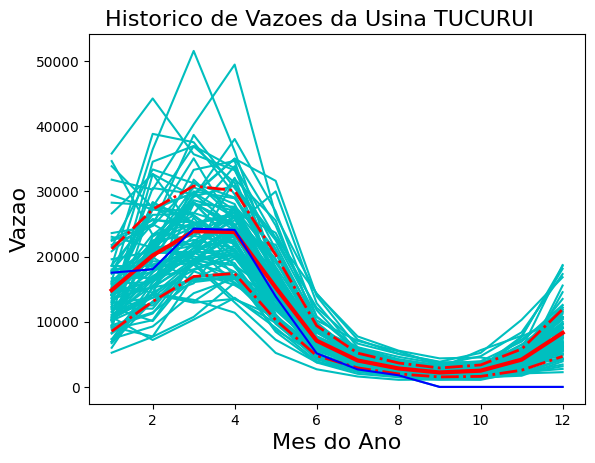

In [68]:
PMOAGO2023.confhd.plot_vaz(Usina)

### Geração de Séries Sintéticas e Média das Séries Sintéticas

#### 200 séries

[14117.218934414605, 12409.931524737065, 19222.61718018993, 17235.867635766917, 16035.301978703337, 6212.720786763626, 3583.566350851061, 2508.91112069319, 2309.194028847906, 2421.188447190835, 4016.7009463084137, 9582.283574990048]


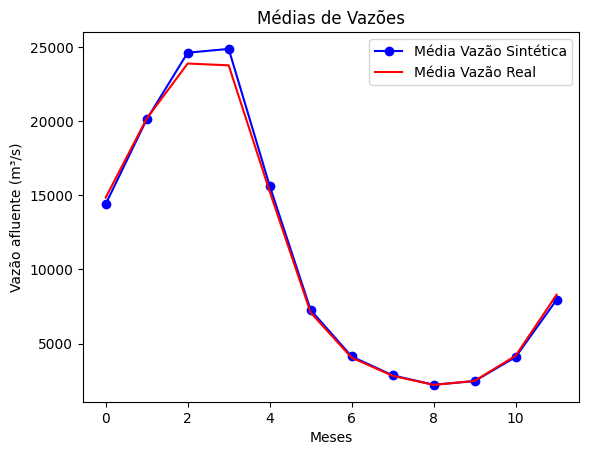

In [85]:
import random
from matplotlib import pyplot as plt

# vazao = Usina['vazoes'][-50].copy()

serie = []
vazao = media_vazao.copy()

num_series = 200

for i in range(0,num_series):
    serie.append([])
    for j in range(0,12):
        a = abs(j - num_phis) + 1
        b = num_phis - a
        serie[i].append(0)
        Z = 0
        if j - num_phis < 0:
            for k, v in enumerate(media_vazao[j- num_phis:]):
                Z += matriz_de_phis[j][num_phis-j-k-1]*v
                # print(Z, k)
            for k, v in enumerate(serie[i][0:j]):
                Z += matriz_de_phis[j][num_phis-k-1]*v
                # print(Z, k)
        else:
            for k, v in enumerate(serie[i][(j-num_phis):j]):
                # print(v, phi[j][melhor_num_meses[j]-k-1])
                Z += matriz_de_phis[j][num_phis-k-1]*v
                # print(Z, k)
        Z += random.choice(matriz_de_residuos[j])
        serie[i][j] = Z

print(serie[0])
plt.figure()
plt.title("Médias de Vazões")
plt.xlabel("Meses")
plt.ylabel("Vazão afluente (m³/s)")
media = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,num_series):
    for j in range(0,12):
        media[j] += serie[i][j]
for j in range(0,12):
    media[j] = media[j]/num_series
plt.plot(list(range(0,12)),media,marker="o",color="blue",label="Média Vazão Sintética")
plt.plot(list(range(0,12)),media_vazao,color="red",label="Média Vazão Real")
plt.legend()

# for i in range(0,num_series):
#     plt.plot(list(range(0,12)),serie[i])

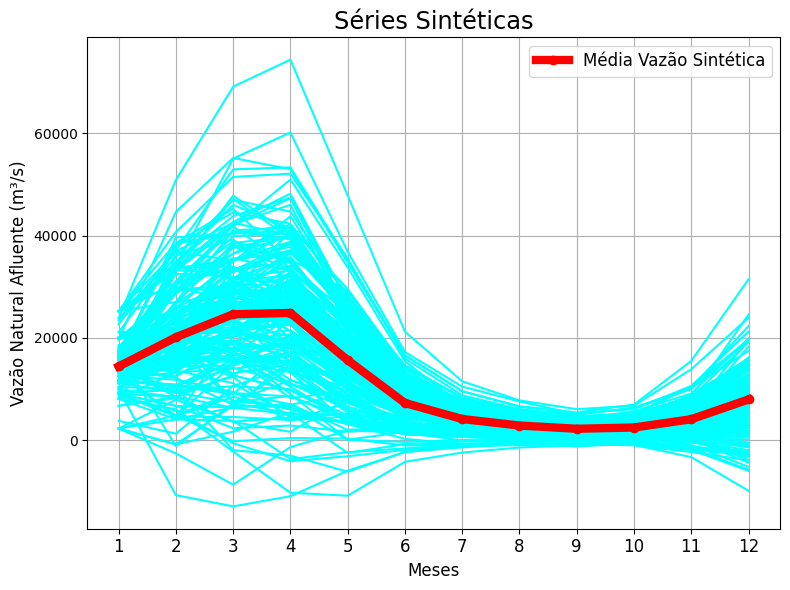

In [86]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))

for i in range(num_series):
  plt.plot(meses, serie[i], color="cyan")
# plt.plot(meses, Vazao_real, marker='d', label="Vazão real")

plt.plot(meses,media,marker="o",linewidth=6.0, color="red",label="Média Vazão Sintética")

plt.legend(fontsize="large")
plt.title('Séries Sintéticas',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

#### 1000 séries

[16443.245019233684, 32784.84118902824, 32712.786996837778, 36611.77747421235, 24889.637448242927, 12986.71092582919, 7947.933962488304, 5613.92168515637, 4293.317001118398, 5616.792439659786, 9867.611762191189, 22252.216101125196]


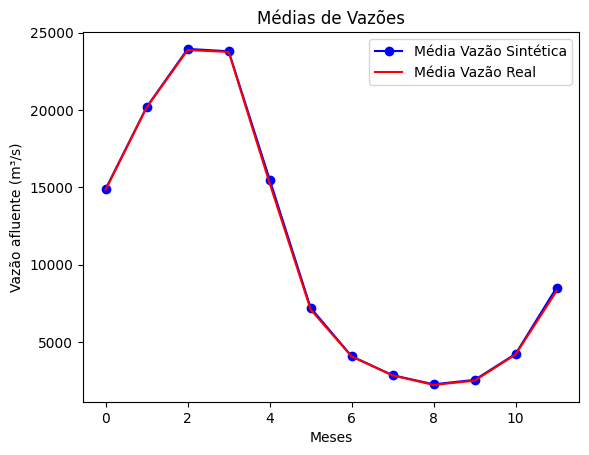

In [87]:
import random
from matplotlib import pyplot as plt

# vazao = Usina['vazoes'][-50].copy()

serie = []
vazao = media_vazao.copy()

num_series = 1000

for i in range(0,num_series):
    serie.append([])
    for j in range(0,12):
        a = abs(j - num_phis) + 1
        b = num_phis - a
        serie[i].append(0)
        Z = 0
        if j - num_phis < 0:
            for k, v in enumerate(media_vazao[j- num_phis:]):
                Z += matriz_de_phis[j][num_phis-j-k-1]*v
                # print(Z, k)
            for k, v in enumerate(serie[i][0:j]):
                Z += matriz_de_phis[j][num_phis-k-1]*v
                # print(Z, k)
        else:
            for k, v in enumerate(serie[i][(j-num_phis):j]):
                # print(v, phi[j][melhor_num_meses[j]-k-1])
                Z += matriz_de_phis[j][num_phis-k-1]*v
                # print(Z, k)
        Z += random.choice(matriz_de_residuos[j])
        serie[i][j] = Z

print(serie[0])
plt.figure()
plt.title("Médias de Vazões")
plt.xlabel("Meses")
plt.ylabel("Vazão afluente (m³/s)")
media = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,num_series):
    for j in range(0,12):
        media[j] += serie[i][j]
for j in range(0,12):
    media[j] = media[j]/num_series
plt.plot(list(range(0,12)),media,marker="o",color="blue",label="Média Vazão Sintética")
plt.plot(list(range(0,12)),media_vazao,color="red",label="Média Vazão Real")
plt.legend()

# for i in range(0,num_series):
#     plt.plot(list(range(0,12)),serie[i])

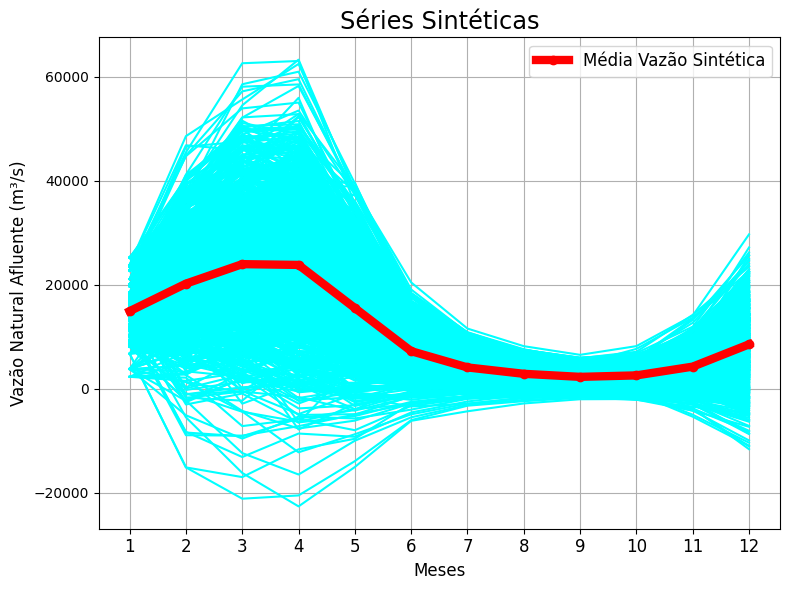

In [88]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))

for i in range(num_series):
  plt.plot(meses, serie[i], color="cyan")
# plt.plot(meses, Vazao_real, marker='d', label="Vazão real")

plt.plot(meses,media,marker="o",linewidth=6.0, color="red",label="Média Vazão Sintética")

plt.legend(fontsize="large")
plt.title('Séries Sintéticas',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

#### 2000 séries

[8078.329857015117, 11834.985462281897, 16142.529864431264, 15142.017151032753, 7254.615697514071, 4135.524640793903, 1691.4496688195918, 821.3321763647808, 642.237561425512, 1021.7128258953362, 2601.5743961675644, 7708.6855561706925]


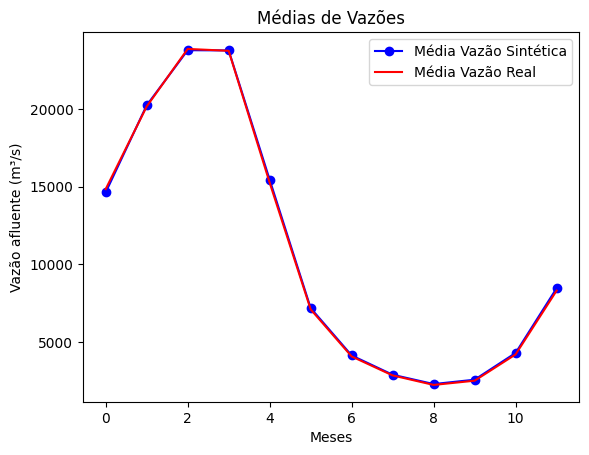

In [89]:
import random
from matplotlib import pyplot as plt

# vazao = Usina['vazoes'][-50].copy()

serie = []
vazao = media_vazao.copy()

num_series = 2000

for i in range(0,num_series):
    serie.append([])
    for j in range(0,12):
        a = abs(j - num_phis) + 1
        b = num_phis - a
        serie[i].append(0)
        Z = 0
        if j - num_phis < 0:
            for k, v in enumerate(media_vazao[j- num_phis:]):
                Z += matriz_de_phis[j][num_phis-j-k-1]*v
                # print(Z, k)
            for k, v in enumerate(serie[i][0:j]):
                Z += matriz_de_phis[j][num_phis-k-1]*v
                # print(Z, k)
        else:
            for k, v in enumerate(serie[i][(j-num_phis):j]):
                # print(v, phi[j][melhor_num_meses[j]-k-1])
                Z += matriz_de_phis[j][num_phis-k-1]*v
                # print(Z, k)
        Z += random.choice(matriz_de_residuos[j])
        serie[i][j] = Z

print(serie[0])
plt.figure()
plt.title("Médias de Vazões")
plt.xlabel("Meses")
plt.ylabel("Vazão afluente (m³/s)")
media = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,num_series):
    for j in range(0,12):
        media[j] += serie[i][j]
for j in range(0,12):
    media[j] = media[j]/num_series
plt.plot(list(range(0,12)),media,marker="o",color="blue",label="Média Vazão Sintética")
plt.plot(list(range(0,12)),media_vazao,color="red",label="Média Vazão Real")
plt.legend()

# for i in range(0,num_series):
#     plt.plot(list(range(0,12)),serie[i])

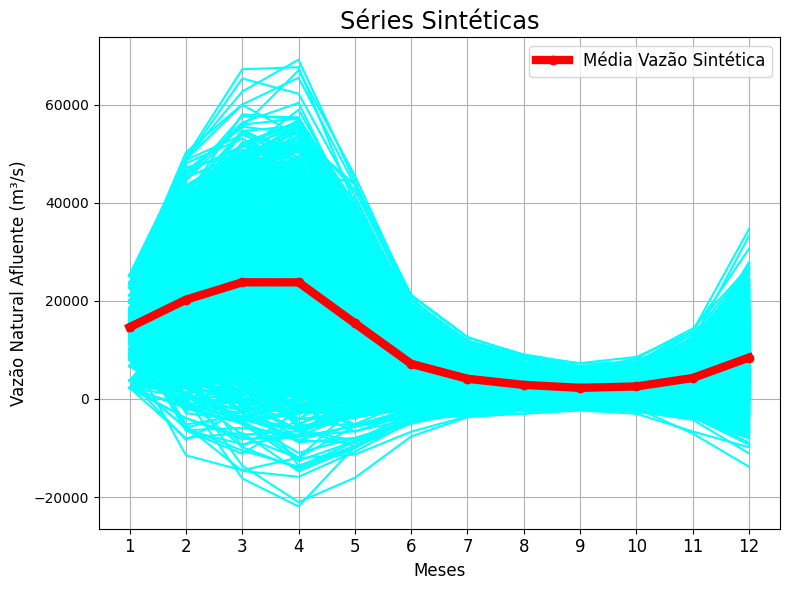

In [90]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))

for i in range(num_series):
  plt.plot(meses, serie[i], color="cyan")
# plt.plot(meses, Vazao_real, marker='d', label="Vazão real")

plt.plot(meses,media,marker="o",linewidth=6.0, color="red",label="Média Vazão Sintética")

plt.legend(fontsize="large")
plt.title('Séries Sintéticas',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

## Cálculo da quantidade de phis ideal para cada mês

In [97]:

for k in range(12):
  imes = k + 1
  print('=====================================================================')
  print(' ')
  print('Mês: ', imes)
  print(' ')
  print('=====================================================================')
  menor_fob = np.inf
  menor_fob_alex = np.inf
  fob = list()
  for i in range(11):
    inum_phis = i + 1

  #         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
    resultado = calculo_regressao_linear(Usina, imes, inum_phis, imprime=False)

    print('FOB = ', resultado[1])
    print(' ')

    if menor_fob >= resultado[1]:
      menor_fob = resultado[1]
      phi_menor_fob = inum_phis

    desvio_padrao_erros = np.std(resultado[0][inum_phis:])

    print('Desvio Padrão Erros = ', desvio_padrao_erros)
    print(' ')

  print('----------------')
  print('Menor FOB = ', menor_fob)
  print('Phi relativo a menor FOB = ', phi_menor_fob)
  print('----------------')
  print(' ')

  print(' ')
  print('Soma dos erros = ', resultado[2])

 
Mês:  1
 
FOB =  1636472918.7750576
 
Desvio Padrão Erros =  4264.156708053067
 
FOB =  1553957011.361497
 
Desvio Padrão Erros =  4155.260402806031
 
FOB =  1446229222.254196
 
Desvio Padrão Erros =  4008.6423612742233
 
FOB =  1440357468.577752
 
Desvio Padrão Erros =  4000.4964533275293
 
FOB =  1440352554.951014
 
Desvio Padrão Erros =  4000.4896296870324
 
FOB =  1430618212.0944173
 
Desvio Padrão Erros =  3986.9484461377465
 
FOB =  1423422571.5574174
 
Desvio Padrão Erros =  3976.909145383884
 
FOB =  1420738427.654993
 
Desvio Padrão Erros =  3973.1577529088777
 
FOB =  1385639938.4321547
 
Desvio Padrão Erros =  3923.7736066079074
 
FOB =  1381576161.0485256
 
Desvio Padrão Erros =  3918.015598982795
 
FOB =  1379936027.399553
 
Desvio Padrão Erros =  3915.689278615159
 
----------------
Menor FOB =  1379936027.399553
Phi relativo a menor FOB =  11
----------------
 
 
Soma dos erros =  3.936406756110955e-12
 
Mês:  2
 
FOB =  4221782146.6724315
 
Desvio Padrão Erros =  6848